# Setup

In [1]:
# Usual libraries are imported here
import os
import yaml
import dask.dataframe as dd
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
german_credit = pd.read_csv('german_credit_data.csv',index_col=0)
german_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


# First part - simple visualizations

What is the distrubition of purpose of loan?

What is the distribution of age?

What is the distribution of and amount of loan?

In [3]:
age_avg = german_credit['Age'].mean()
cre_avg = german_credit['Credit amount'].mean()
dur_avg = german_credit['Duration'].mean()

Mean age is 35.546


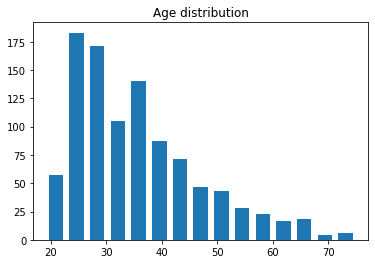

In [4]:
plt.hist(german_credit["Age"], 15, histtype='bar', rwidth=0.7)
plt.title("Age distribution")
print("Mean age is {}".format(age_avg))

Mean credit amount is 3271.258


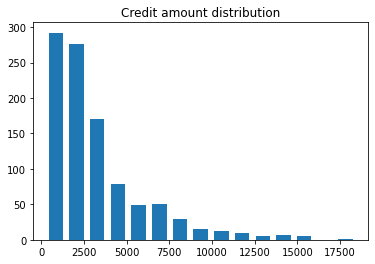

In [5]:
plt.hist(german_credit["Credit amount"], 15, histtype='bar', rwidth=0.7)
plt.title("Credit amount distribution")
print("Mean credit amount is {}".format(cre_avg))

Mean Duration is 20.903


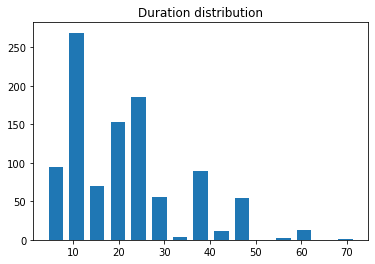

In [6]:
plt.hist(german_credit["Duration"], 15, histtype='bar', rwidth=0.7)
plt.title("Duration distribution")
print("Mean Duration is {}".format(dur_avg))

In [7]:
pur_grp = german_credit.groupby(['Purpose']).size().reset_index()
pur_grp.columns = ['Purpose','count']
top = pur_grp.sort_values(by = 'count',ascending = False)[:3]
top

,Purpose,count
1,car,337
5,radio/TV,280
4,furniture/equipment,181


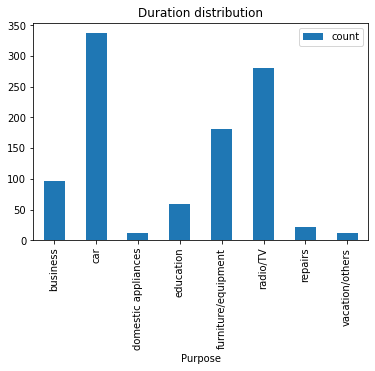

In [8]:
pur_grp.plot(x='Purpose',kind='bar')
plt.title("Duration distribution")
plt.show()

From the plots above, we can clearly see that the top three purposes are "car, radio/tv, furniture" which is consistent of our finding. 

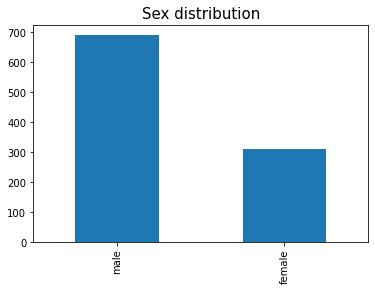

In [9]:
german_credit["Sex"].value_counts().plot(kind='bar')
plt.title("Sex distribution",fontsize=15)
plt.show()

From the barplot of categorical variable(Sex), we can see that males are indeed the major loan taker.

# Second part

In order to gain the insights required, you may ask youself
For both good loan and bad loan takers:

Is there any correlation between the purpose of loan and gender?

Is there any correlation between the purpose of loan and age group?

...etc.

The definition of good or bad loan takers are normally decided by whether the person has the ability to pay back, it depends mostly on the savings and income. In common sense, we define good loan takers as adults in middle age with at least one job and own housing and high credit amount and moderate or above level amount of money in both savings and checking account.

Is there any correlation between the purpose of loan and gender?

In [10]:
german_credit.groupby(['Sex','Purpose']).size().sort_values(ascending=False).head(20)

Sex     Purpose            
male    car                    243
        radio/TV               195
        furniture/equipment    107
female  car                     94
        radio/TV                85
male    business                78
female  furniture/equipment     74
male    education               35
female  education               24
        business                19
male    repairs                 17
        vacation/others          9
female  domestic appliances      6
male    domestic appliances      6
female  repairs                  5
        vacation/others          3
dtype: int64

There is not much correlation between the purpose of loans and gender, the top 3 purpose for both males and females are car, radio, and furniture

Is there any correlation between the purpose of loan and age group?

In [11]:
#create categorical variables for age column
age_interval = (10, 25, 35, 55, 110)
categories = ['teenagers(10-25)', 'young adults(25-35)', 'middle-aged adults(35-55)', 'seniors(55-110)']
german_credit["cate_age"] = pd.cut(german_credit["Age"], age_interval, labels=categories)

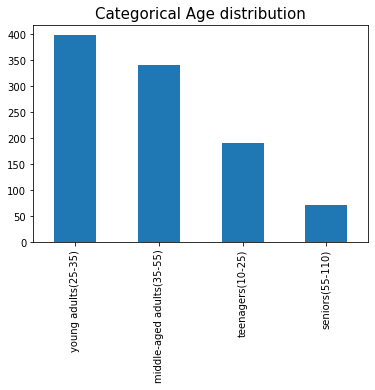

In [12]:
#plot the distribution of different age groups
german_credit["cate_age"].value_counts().plot(kind='bar')
plt.title("Categorical Age distribution",fontsize=15)
plt.show()

The loan takers are mostly adults from 25 to 55

In [13]:
german_credit.groupby(['Purpose','cate_age']).size().sort_values(ascending=False).head(20)

Purpose              cate_age                 
car                  middle-aged adults(35-55)    136
                     young adults(25-35)          127
radio/TV             young adults(25-35)          114
                     middle-aged adults(35-55)     83
furniture/equipment  young adults(25-35)           75
radio/TV             teenagers(10-25)              64
furniture/equipment  teenagers(10-25)              52
                     middle-aged adults(35-55)     51
business             young adults(25-35)           47
car                  teenagers(10-25)              46
business             middle-aged adults(35-55)     31
car                  seniors(55-110)               28
education            middle-aged adults(35-55)     24
                     young adults(25-35)           21
radio/TV             seniors(55-110)               19
business             teenagers(10-25)              10
                     seniors(55-110)                9
education            teenagers(10-2

In [14]:
german_credit.groupby(['cate_age','Purpose','Sex']).size().sort_values(ascending=False).head(20)

cate_age                   Purpose              Sex   
middle-aged adults(35-55)  car                  male      111
young adults(25-35)        car                  male       92
                           radio/TV             male       82
middle-aged adults(35-55)  radio/TV             male       65
young adults(25-35)        furniture/equipment  male       45
middle-aged adults(35-55)  furniture/equipment  male       40
young adults(25-35)        business             male       38
teenagers(10-25)           radio/TV             male       37
young adults(25-35)        car                  female     35
teenagers(10-25)           furniture/equipment  female     32
young adults(25-35)        radio/TV             female     32
                           furniture/equipment  female     30
teenagers(10-25)           car                  female     28
                           radio/TV             female     27
middle-aged adults(35-55)  business             male       26
               

Most loans are taken by males, especially used by males to buy cars for both middle-aged and young adults, which is consistent with the fact that students are leaving college and need cars to commute, but normally they don't have that much savings so they take loans.

Is there any correlation between the credit amount and duration?

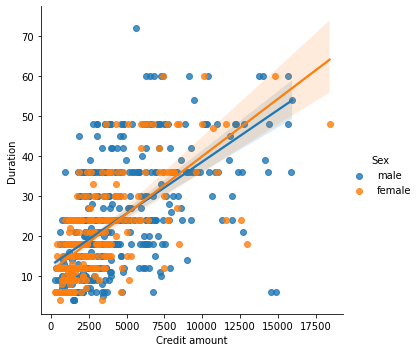

In [15]:
#In assumption, two variables credit amount and duration have clear positive correlations
#  because the longer the period of loans are, the more credit amount that the loan takers will take
#The visualization shows that there is a positive relation with both sex and different housing
sns.lmplot(x="Credit amount",y="Duration", data=german_credit,hue="Sex" )
plt.show()

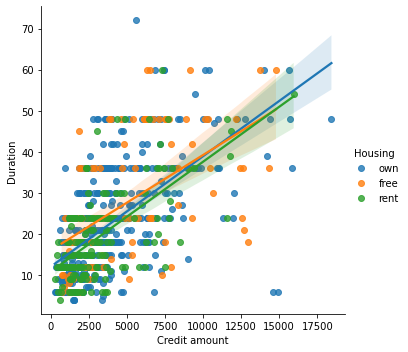

In [16]:
sns.lmplot(x="Credit amount",y="Duration", data=german_credit, hue="Housing")
plt.show()